In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [18]:
df=pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [4]:
%matplotlib inline

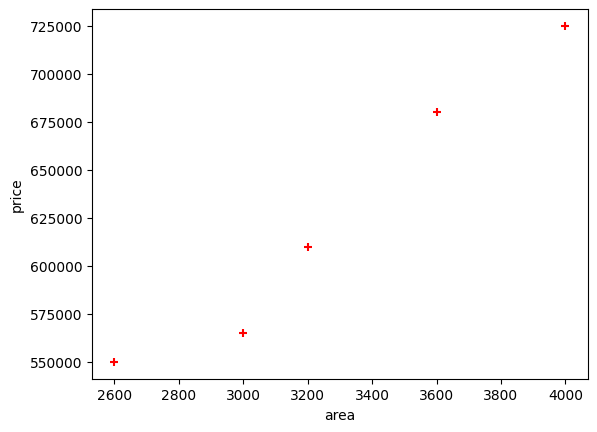

In [5]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [24]:
reg=linear_model.LinearRegression()
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [25]:
reg.fit(X,Y)

LinearRegression()

In [27]:
reg.predict([[3300]])

c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [28]:
df=pd.read_csv('canada_per_capita_income.csv')
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [29]:
reg=linear_model.LinearRegression()

In [30]:
reg.fit(df[['year']],df['per capita income (US$)'])

LinearRegression()

In [31]:
reg.predict([[2020]])

c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

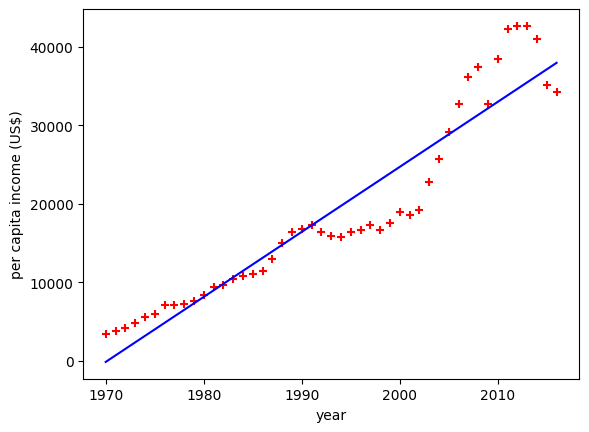

In [32]:
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.scatter(df[['year']],df['per capita income (US$)'],color='red',marker='+')
plt.plot(df[['year']],reg.predict(df[['year']]),color='blue')


In [33]:
import pickle

In [45]:
with open('model_pickle','wb') as f:
    pickle.dump(reg,f)




In [47]:
with open('model_pickle','rb') as f:
    model=pickle.load(f)
model.predict([[2020]])

c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [60]:
cardf=pd.read_csv('carprices.csv')
cardf

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [59]:
dummyvar=pd.get_dummies(cardf[['Car Model']])
dummyvar

,Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
5,True,False,False
6,True,False,False
7,True,False,False
8,True,False,False
9,False,False,True


In [61]:
car=pd.concat([cardf,dummyvar],axis="columns")
car

,Car Model,Mileage,Sell Price($),Age(yrs),Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,BMW X5,69000,18000,6,False,True,False
1,BMW X5,35000,34000,3,False,True,False
2,BMW X5,57000,26100,5,False,True,False
3,BMW X5,22500,40000,2,False,True,False
4,BMW X5,46000,31500,4,False,True,False
5,Audi A5,59000,29400,5,True,False,False
6,Audi A5,52000,32000,5,True,False,False
7,Audi A5,72000,19300,6,True,False,False
8,Audi A5,91000,12000,8,True,False,False
9,Mercedez Benz C class,67000,22000,6,False,False,True


In [63]:
car=car.drop(['Car Model','Car Model_Audi A5'], axis="columns")
car

KeyError: "['Car Model', 'Car Model_Audi A5'] not found in axis"

In [64]:
car

,Mileage,Sell Price($),Age(yrs),Car Model_BMW X5,Car Model_Mercedez Benz C class
0,69000,18000,6,True,False
1,35000,34000,3,True,False
2,57000,26100,5,True,False
3,22500,40000,2,True,False
4,46000,31500,4,True,False
5,59000,29400,5,False,False
6,52000,32000,5,False,False
7,72000,19300,6,False,False
8,91000,12000,8,False,False
9,67000,22000,6,False,True


In [65]:
X=car.drop(['Sell Price($)'],axis="columns")

In [66]:
Y=car['Sell Price($)']

In [67]:
carmodel=linear_model.LinearRegression()

In [68]:
carmodel.fit(X,Y)

LinearRegression()

In [69]:
X

,Mileage,Age(yrs),Car Model_BMW X5,Car Model_Mercedez Benz C class
0,69000,6,True,False
1,35000,3,True,False
2,57000,5,True,False
3,22500,2,True,False
4,46000,4,True,False
5,59000,5,False,False
6,52000,5,False,False
7,72000,6,False,False
8,91000,8,False,False
9,67000,6,False,True


In [78]:
Y_pred=carmodel.predict(X)
Y_pred

array([18705.2723644 , 35286.78445645, 24479.19112468, 41245.76426391,
       29882.98779056, 28023.6135243 , 30614.46818502, 21879.57266964,
       12182.34562104, 26183.72387884, 18929.31674102, 20409.80511857,
       30477.15426156])

In [79]:
carmodel.score(X,Y)

0.9417050937281082

In [ ]:
carmodel.score()

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
X_train

,Mileage,Age(yrs),Car Model_BMW X5,Car Model_Mercedez Benz C class
11,79000,7,False,True
1,35000,3,True,False
12,59000,5,False,True
3,22500,2,True,False
7,72000,6,False,False
0,69000,6,True,False
10,83000,7,False,True
4,46000,4,True,False
8,91000,8,False,False
9,67000,6,False,True
